In [98]:
import subprocess
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import numpy as np

## Spin-Locks

### Executando os estudos de caso
<hr/>

- Para $n = 10^7$, $n = 10^8$, $n = 10^9$

In [39]:
csv_file = 'results/spin_lock_tests.csv'
with open(csv_file, 'a') as f:
    f.write('n,k,time,test\n')

In [40]:
for n in range(7, 10):
    k = 1
    while(k <= 256):
        for i in range(0, 10):
            print(f'Adding 10^{n} with {k} threads: test {i}')
            try:
                out = subprocess.check_output(["./spin-locks/somador.out", f'{n}', f'{k}'])
            except subprocess.CalledProcessError as e:
                print(e.output)
                break
            else: 
                time = float(str(out).split('Time spent: ')[1][:-3])
                with open(csv_file, 'a') as f:
                    f.write(f'10^{n},{k},{time},{i}\n')
        k *= 2       

### Analisando os resultados
<hr/>

In [41]:
spin_lock_df = pd.read_csv('results/spin_lock_tests.csv')
spin_lock_df.head()

,n,k,time,test
0,10^7,1,0.032981,0
1,10^7,1,0.033148,1
2,10^7,1,0.036306,2
3,10^7,1,0.034348,3
4,10^7,1,0.087074,4


Text(0.5, 1.0, '10^9 numbers')

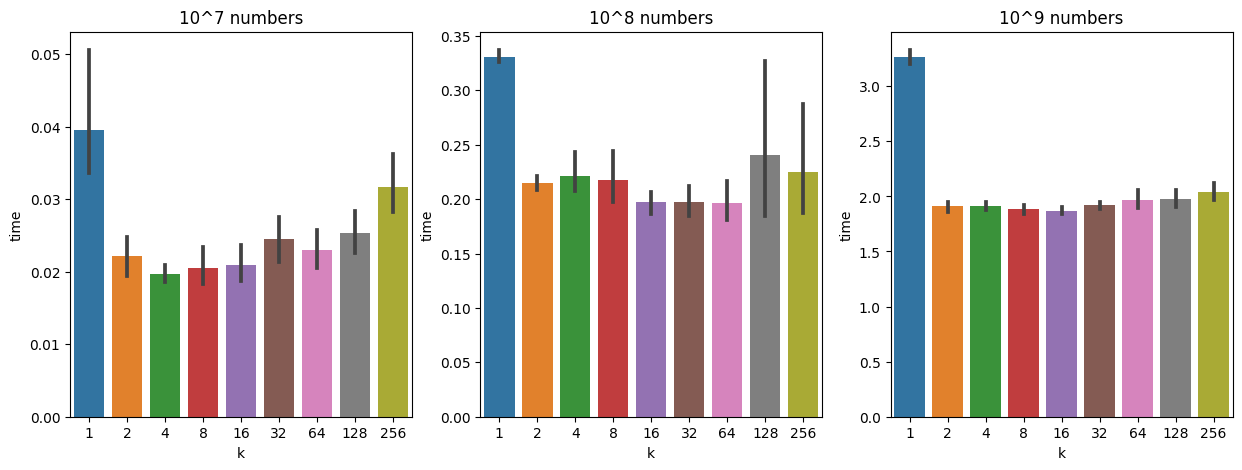

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 10^7
sns.barplot(ax=axes[0], data=spin_lock_df[spin_lock_df['n'] == '10^7'], x='k', y='time')
axes[0].set_title('10^7 numbers')


# 10^8
sns.barplot(ax=axes[1], data=spin_lock_df[spin_lock_df['n'] == '10^8'], x='k', y='time')
axes[1].set_title('10^8 numbers')

# 10^9
sns.barplot(ax=axes[2], data=spin_lock_df[spin_lock_df['n'] == '10^9'], x='k', y='time')
axes[2].set_title('10^9 numbers')


- Resultados antigos

In [43]:
old_spin_lock_df = pd.read_csv('results/spin_lock_test_old.csv')
old_spin_lock_df.head()

,n,k,time,test
0,10^7,1,0.396533,0
1,10^7,1,0.401666,1
2,10^7,1,0.381371,2
3,10^7,1,0.370358,3
4,10^7,1,0.417366,4


Text(0.5, 1.0, '10^9 numbers')

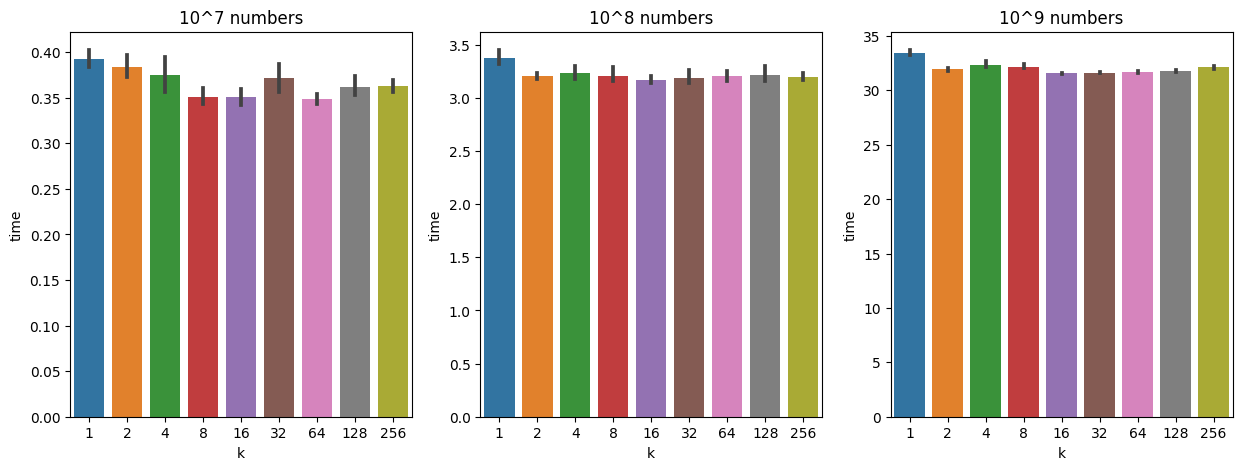

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 10^7
sns.barplot(ax=axes[0], data=old_spin_lock_df[old_spin_lock_df['n'] == '10^7'], x='k', y='time')
axes[0].set_title('10^7 numbers')


# 10^8
sns.barplot(ax=axes[1], data=old_spin_lock_df[old_spin_lock_df['n'] == '10^8'], x='k', y='time')
axes[1].set_title('10^8 numbers')

# 10^9
sns.barplot(ax=axes[2], data=old_spin_lock_df[old_spin_lock_df['n'] == '10^9'], x='k', y='time')
axes[2].set_title('10^9 numbers')


## Semáforo

### Executando os estudos de caso
<hr/>

- Testando todas as combimbinações 10 vezes

In [45]:
csv_file = 'results/semaforo_tests.csv'
with open(csv_file, 'a') as f:
    f.write('n,np,nc,time,test\n')

In [46]:
for n in [1,10,100,1000]:
    t = [[1,1],[1,2],[1,4],[1,8],[2,1],[4,1],[8,1]]
    for pc in t:
        print(n,pc[0], pc[1])
        for i in range(1, 10):
            try:
                print(f'Mem: {n} with {pc[0]} and {pc[1]} threads')
                out = subprocess.check_output(["./Semaforo/produtor-consumidor.out", f'{pc[0]}', f'{pc[1]}', f'{n}'])
            except subprocess.CalledProcessError as e:
                print(e.output)
                break
            else:
                print(str(out))
                time = float(str(out).split(' tempo: ')[1][:-3])
                with open(csv_file, 'a') as f:
                    f.write(f'{n},{pc[0]},{pc[1]},{time},{i}\n')
           

- testando todas as combinações para a geração dos arquivos de buffer

In [ ]:
for n in [1,10,100,1000]:
    t = [[1,1],[1,2],[1,4],[1,8],[2,1],[4,1],[8,1]]
    for pc in t:
        print(n,pc[0], pc[1])
        try:
            print(f'Mem: {n} with {pc[0]} and {pc[1]} threads')
            out = subprocess.check_output(["./Semaforo/produtor-consumidor.out", f'{pc[0]}', f'{pc[1]}', f'{n}'])
        except subprocess.CalledProcessError as e:
            print(e.output)
            break

### Analisando os resultados
<hr/>

- Tempo de execução do algoritmo

In [8]:
semaforo_df = pd.read_csv('results/semaforo_tests.csv')
semaforo_df.head()

,n,np,nc,time,test
0,1,1,1,41.4410,1
1,1,1,1,43.2792,2
2,1,1,1,41.0656,3
3,1,1,1,42.2250,4
4,1,1,1,39.6654,5


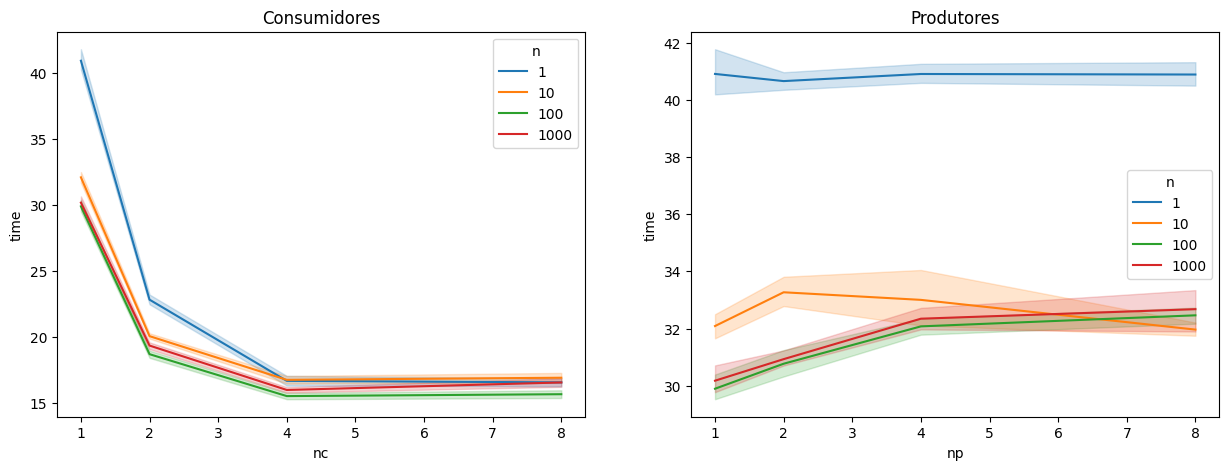

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(ax=axes[0], data=semaforo_df[semaforo_df['np'] == 1], x='nc', y='time', hue='n', palette='tab10')
axes[0].set_title('Consumidores')

sns.lineplot(ax=axes[1], data=semaforo_df[semaforo_df['nc'] == 1], x='np', y='time', hue='n', palette='tab10')
axes[1].set_title('Produtores')

plt.show()

- Ocupação do buffer

In [22]:

dataframes = []
path = 'results/buffer/'
for arquivo in os.listdir(path):
    _, np, nc, n = arquivo.split('_')
    df = pd.read_csv(path + arquivo)
    df['np'] = int(np)
    df['nc'] = int(nc)
    df['n'] = int(n[:-4])
    dataframes.append(df)


df_concatenado = pd.concat(dataframes)

In [90]:
df_n1 = df_concatenado[df_concatenado['n'] == 1].groupby(by=['nc', 'np']).head(10)
df_n10 = df_concatenado[df_concatenado['n'] == 10].groupby(by=['nc', 'np']).head(100)
df_n100 = df_concatenado[df_concatenado['n'] == 100].groupby(by=['nc', 'np']).head(1000)
df_n1000 = df_concatenado[df_concatenado['n'] == 1000].groupby(by=['nc', 'np']).head(10000)

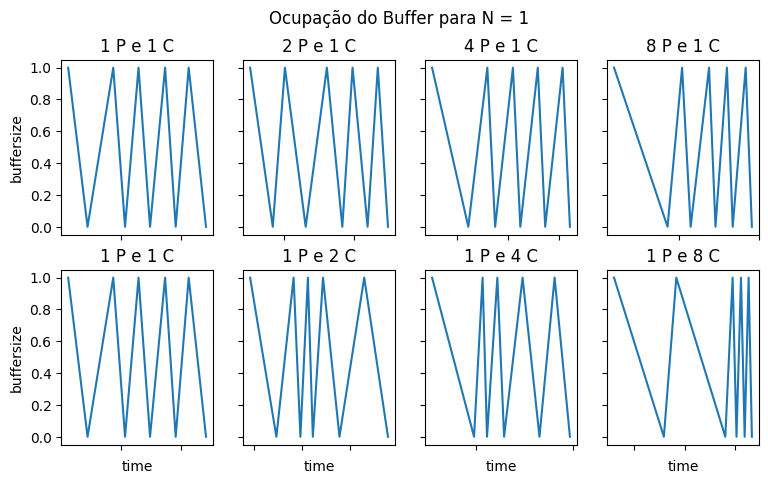

In [144]:
fig, axes = plt.subplots(2, 4, figsize=(9, 5), sharey=True)

fig.suptitle('Ocupação do Buffer para N = 1')
for i, np in enumerate([1, 2, 4, 8]):
    sns.lineplot(ax=axes[0, i], data= df_n1[(df_n1['nc'] == 1 ) & (df_n1['np'] == np)], x='time', y='buffersize')
    axes[0, i].set_title(f'{np} P e {1} C')
    axes[0, i].set_xticklabels([])
    axes[0, i].set_xlabel('')
for i, nc in enumerate([1, 2, 4, 8]):
    sns.lineplot(ax=axes[1, i], data= df_n1[(df_n1['np'] == 1 ) & (df_n1['nc'] == nc)], x='time', y='buffersize')
    axes[1, i].set_title(f'{1} P e {nc} C')
    axes[1, i].set_xticklabels([])

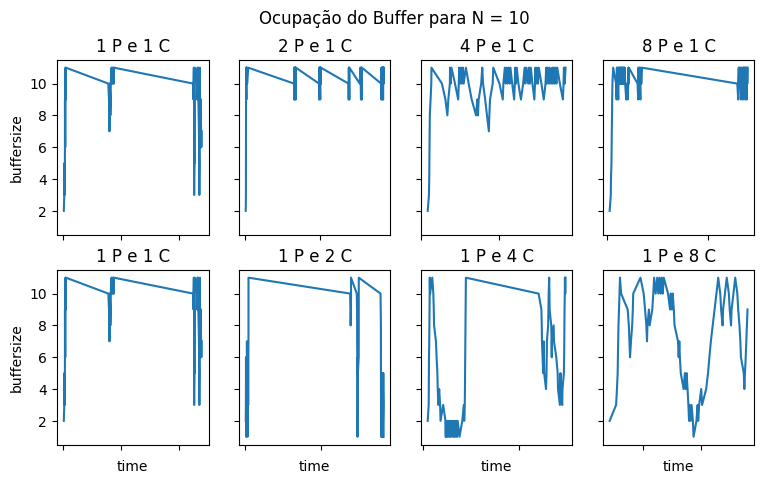

In [145]:
fig, axes = plt.subplots(2, 4, figsize=(9, 5), sharey=True)

fig.suptitle('Ocupação do Buffer para N = 10')
for i, np in enumerate([1, 2, 4, 8]):
    sns.lineplot(ax=axes[0, i], data= df_n10[(df_n10['nc'] == 1 ) & (df_n10['np'] == np)], x='time', y='buffersize')
    axes[0, i].set_title(f'{np} P e {1} C')
    axes[0, i].set_xticklabels([])
    axes[0, i].set_xlabel('')
for i, nc in enumerate([1, 2, 4, 8]):
    sns.lineplot(ax=axes[1, i], data= df_n10[(df_n10['np'] == 1 ) & (df_n10['nc'] == nc)], x='time', y='buffersize')
    axes[1, i].set_title(f'{1} P e {nc} C')
    axes[1, i].set_xticklabels([])

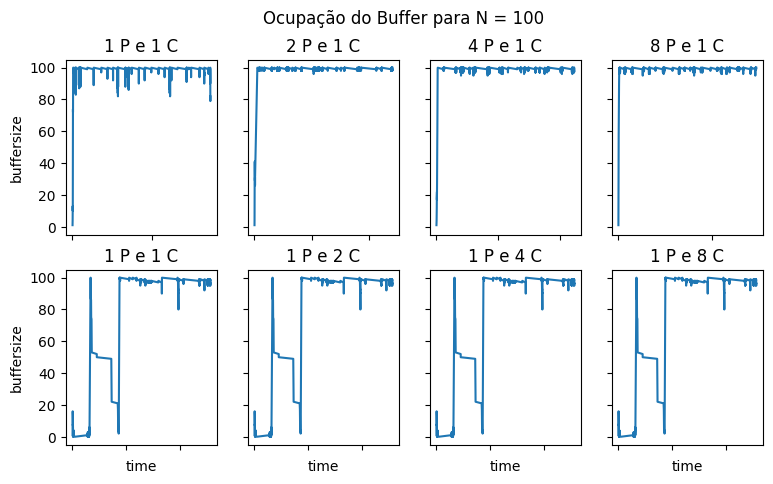

In [141]:
fig, axes = plt.subplots(2, 4, figsize=(9, 5), sharey=True)

fig.suptitle('Ocupação do Buffer para N = 100')
for i, np in enumerate([1, 2, 4, 8]):
    sns.lineplot(ax=axes[0, i], data= df_n100[(df_n100['nc'] == 1 ) & (df_n100['np'] == np)], x='time', y='buffersize')
    axes[0, i].set_title(f'{np} P e {1} C')
    axes[0, i].set_xticklabels([])
    axes[0, i].set_xlabel('')
for i, nc in enumerate([1, 2, 4, 8]):
    sns.lineplot(ax=axes[1, i], data= df_n100[(df_n100['np'] == 1 ) & (df_n100['nc'] == nc)], x='time', y='buffersize')
    axes[1, i].set_title(f'{1} P e {nc} C')
    axes[1, i].set_xticklabels([])

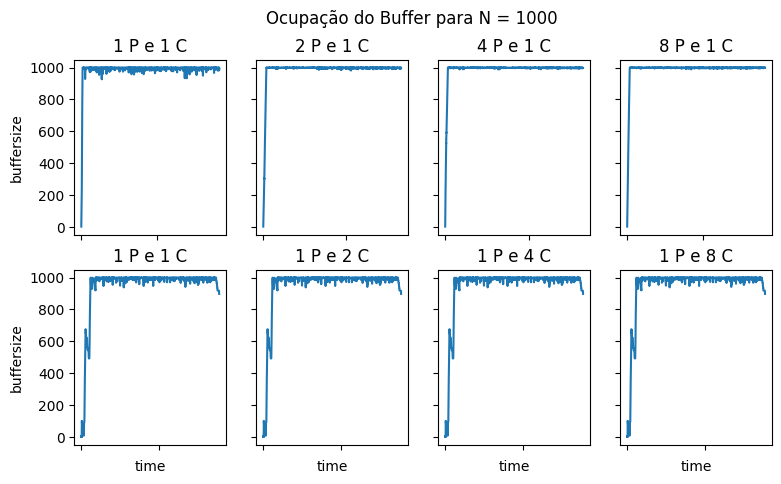

In [143]:
fig, axes = plt.subplots(2, 4, figsize=(9, 5), sharey=True)

fig.suptitle('Ocupação do Buffer para N = 1000')
for i, np in enumerate([1, 2, 4, 8]):
    sns.lineplot(ax=axes[0, i], data= df_n1000[(df_n1000['nc'] == 1 ) & (df_n1000['np'] == np)], x='time', y='buffersize')
    axes[0, i].set_title(f'{np} P e {1} C')
    axes[0, i].set_xticklabels([])
    axes[0, i].set_xlabel('')
for i, nc in enumerate([1, 2, 4, 8]):
    sns.lineplot(ax=axes[1, i], data= df_n1000[(df_n1000['np'] == 1 ) & (df_n1000['nc'] == np)], x='time', y='buffersize')
    axes[1, i].set_title(f'{1} P e {nc} C')
    axes[1, i].set_xticklabels([])